<a href="https://colab.research.google.com/github/halldm2000/NOAA-AI-2020-TUTORIAL/blob/master/02_CurveFitting/1DCurveFitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Excersie 2: Curve Fitting (The Hard Way)**
- Deep learning is a powerful technique
- But it's just a generalization of curve fitting
- Let's fit a curve manually to build some intuition
- (Note: Works in the Chrome browser, but may not work in other browsers)

In [1]:
# check out tutorial code
!git clone -q https://github.com/halldm2000/NOAA-AI-2020-TUTORIAL
%cd /content/NOAA-AI-2020-TUTORIAL/02_CurveFitting/
!git pull -q

/content/NOAA-AI-2020-TUTORIAL/02_CurveFitting


### **Download CO2 Data**

* Use `wget` to download Mauna Loa CO2 observations from the NOAA website

In [2]:
# download co2 data from website: https://www.esrl.noaa.gov/gmd/ccgg/trends/data.html
!wget -q -c -P data/ ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_weekly_mlo.txt

# load numpy arrays from file: x = years since 1974  y=CO2 ppm
from tutorial import load_co2_data
x,y = load_co2_data(); display(x,y)

Number of CO2 obsertvations = 2372


array([ 0.3795,  0.3986,  0.4178, ..., 46.1653, 46.1844, 46.2036])

array([333.34, 332.95, 332.32, ..., 413.87, 414.11, 414.28])

### **Fit a Trend Line**

Try to fit a trend line by manually adjusting the slope **m** and y-intercept **b**.

In [3]:
#%matplotlib inline
from tutorial import plot_co2_data
import ipywidgets as widgets

def fit(m,b): 

  plot_co2_data(x, y, ypred = m*x + b)

  # plot co2 data and measure loss 
  # ypred = m*x + b
  # loss   = sum( abs(ypred-y) / y.size ) # get average CO2 error in ppm
  # plot_co2_data(x, y, ypred, loss)

mslider = widgets.FloatSlider(min=0  ,max=3  ,step=0.01, continuous_update = False)
bslider = widgets.FloatSlider(min=320,max=360,step=0.10, continuous_update = False)
iplot   = widgets.interactive(fit, m=mslider, b=bslider)
iplot.children[-1].layout.height='800px'
iplot

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='m', max=3.0, step=0.01), Fl…

### **Add a loss function**

Add a loss function to quantify how good the fit is.

In [9]:
from numpy import sum, abs

def fit_with_loss(m,b):

  #plot_co2_data(x, y, ypred = m*x + b)

  # plot co2 data and measure loss 
  ypred = m*x + b
  loss   = sum( abs(ypred-y) / y.size ) # get average CO2 error in ppm
  plot_co2_data(x, y, ypred, loss)

iplot = widgets.interactive(fit_with_loss, m=mslider, b=bslider)
iplot.children[-1].layout.height='800px'
iplot

interactive(children=(FloatSlider(value=1.98, continuous_update=False, description='m', max=3.0, step=0.01), F…

### **Plot Loss as a Function of Slope m and Intercept b**

m=1.80 b=325.00 loss=2.56


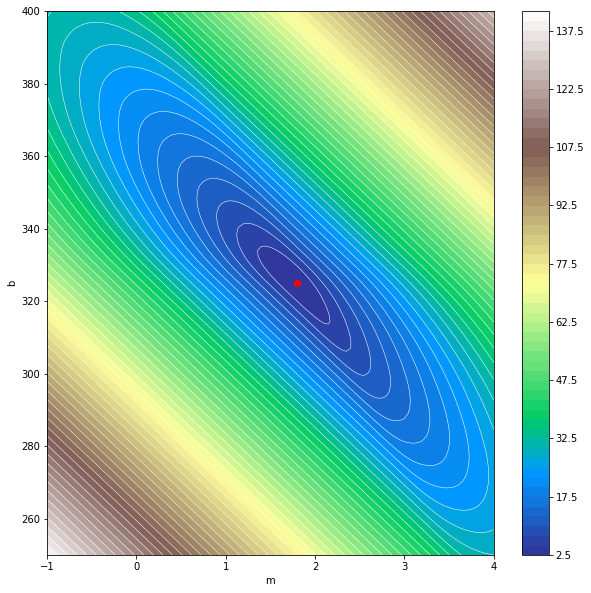

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def loss(m,b):
  y_pred = m*x + b
  L = 1
  loss = sum( abs(y_pred-y)**L / y.size )**(1/L)
  return loss

# compute losses at each point on a grid
N = 101
mrange = np.linspace(-1  ,4  , N)
brange = np.linspace(250,400, N)
losses = np.array([[loss(m,b) for m in mrange] for b in brange])

# find smallest loss on the grid
bi,mi = np.unravel_index(np.argmin(losses),losses.shape)
mmin = mrange[mi]
bmin = brange[bi]
lmin = np.min(losses)
print(f"m={mmin:.2f} b={bmin:.2f} loss={lmin:.2f}")

# plot loss surface using filled contours and mark minimum point
plt.figure(figsize=(10,10))
plt.contour(mrange,brange,losses,colors='w',levels=60,linewidths=0.5)
plt.contourf(mrange,brange,losses,levels=60,cmap='terrain')
plt.xlabel('m'); plt.ylabel('b')
plt.colorbar()
plt.scatter(mmin,bmin,color='r');